In [1]:
import numpy as np
import tensorflow as tf
from ipynb.fs.full.parse import Crawler
import sys
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

TEST_SIZE = 231
FEATURES = 24
OUTPUTS = 1

if __name__ == "__main__":
    n_input = 24 # MNIST data input (img shape: 28*28)
    n_treatments = 1 # MNIST total classes (0-9 digits)
    tf.compat.v1.disable_eager_execution()
    x = tf.compat.v1.placeholder("float", [None, n_input])
    y = tf.compat.v1.placeholder("float", [None, n_treatments])

In [2]:
    objCrawler = Crawler("FinalCancer_Data.csv")
    data = objCrawler.p_input()

In [3]:
    max0 = np.amax(data[:, np.r_[0]])
    max1 = np.amax(data[:, np.r_[1]])
    max5 = np.amax(data[:, np.r_[5]])
    max6 = np.amax(data[:, np.r_[6]])
    max7 = np.amax(data[:, np.r_[7]])
    max8 = np.amax(data[:, np.r_[8]])
    max9 = np.amax(data[:, np.r_[9]])
    max10 = np.amax(data[:, np.r_[10]])
    max11 = np.amax(data[:, np.r_[11]])

    for dataElements in data:
        dataElements[0] = dataElements[0]/max0
        dataElements[1] = dataElements[1]/max1
        dataElements[5] = dataElements[5]/max5
        dataElements[6] = dataElements[6]/max6
        dataElements[7] = dataElements[7]/max7
        dataElements[8] = dataElements[8]/max8
        dataElements[9] = dataElements[9]/max9
        dataElements[10] = dataElements[10]/max10
        dataElements[11] = dataElements[11]/max11

In [4]:
    testInput = data[:TEST_SIZE,:FEATURES]
    testOutput = data[:TEST_SIZE, -OUTPUTS:]

    trainInput = data[TEST_SIZE:, :FEATURES]
    trainOutput = data[TEST_SIZE:, -OUTPUTS:]

    train_size = len(trainInput)

In [5]:
    import keras
    from keras.models import Sequential
    from keras.layers import Dense

    classifier = Sequential()
    classifier.add(Dense(1024, activation='relu', kernel_initializer='uniform',input_dim=24))
    classifier.add(Dense(256, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dense(24, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(trainInput, trainOutput, batch_size = 10, epochs = 100,verbose=1 )

Train on 1587 samples
Epoch 1/100
1587/1587 [==============================] - 1s 540us/sample - loss: 0.6439 - accuracy: 0.6597
Epoch 2/100
1587/1587 [==============================] - 1s 397us/sample - loss: 0.6254 - accuracy: 0.6635
Epoch 3/100
1587/1587 [==============================] - 1s 415us/sample - loss: 0.6227 - accuracy: 0.6635
Epoch 4/100
1587/1587 [==============================] - 1s 392us/sample - loss: 0.6148 - accuracy: 0.6711
Epoch 5/100
1587/1587 [==============================] - 1s 391us/sample - loss: 0.6124 - accuracy: 0.6698
Epoch 6/100
1587/1587 [==============================] - 1s 412us/sample - loss: 0.6133 - accuracy: 0.6730
Epoch 7/100
1587/1587 [==============================] - 1s 433us/sample - loss: 0.6112 - accuracy: 0.6793
Epoch 8/100
1587/1587 [==============================] - 1s 430us/sample - loss: 0.6104 - accuracy: 0.6686
Epoch 9/100
1587/1587 [==============================] - 1s 454us/sample - loss: 0.6067 - accuracy: 0.6774
Epoch 10/100
15

1587/1587 [==============================] - 1s 536us/sample - loss: 0.5450 - accuracy: 0.7215
Epoch 77/100
1587/1587 [==============================] - 1s 520us/sample - loss: 0.5438 - accuracy: 0.7133
Epoch 78/100
1587/1587 [==============================] - 1s 491us/sample - loss: 0.5475 - accuracy: 0.7246
Epoch 79/100
1587/1587 [==============================] - 1s 459us/sample - loss: 0.5399 - accuracy: 0.7253
Epoch 80/100
1587/1587 [==============================] - 1s 488us/sample - loss: 0.5359 - accuracy: 0.7259
Epoch 81/100
1587/1587 [==============================] - 1s 430us/sample - loss: 0.5458 - accuracy: 0.7146
Epoch 82/100
1587/1587 [==============================] - 1s 362us/sample - loss: 0.5401 - accuracy: 0.7190
Epoch 83/100
1587/1587 [==============================] - 1s 405us/sample - loss: 0.5326 - accuracy: 0.7265
Epoch 84/100
1587/1587 [==============================] - 1s 366us/sample - loss: 0.5309 - accuracy: 0.7290
Epoch 85/100
1587/1587 [=================

In [6]:
y_pred = classifier.predict(testInput)
y_pred = (y_pred > 0.50)

<AxesSubplot:>

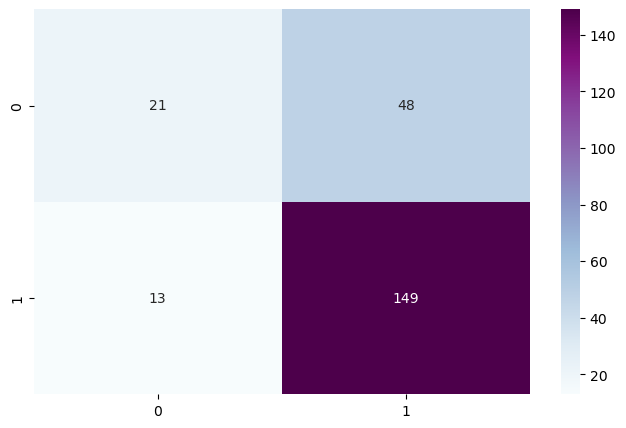

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrix_A = confusion_matrix(testOutput, y_pred)
confusion_matrix_A
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_A,annot=True,fmt='g',cmap='BuPu')

In [8]:
accuracy_score(testOutput, y_pred)

0.7359307359307359

In [9]:
y1 = classifier.predict(testInput[10:11])
y1 = y1*100
print("predicted chance of survival is",y1[0][0],"%")

predicted chance of survival is 77.083954 %
